In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\abhis\\Downloads\\Linear Regression Sample Data sets\\Salary_Data.csv')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

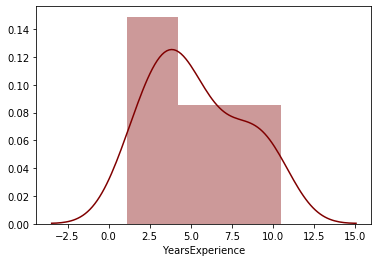

In [16]:
sns.distplot(df['YearsExperience'],bins=3,color ='maroon')

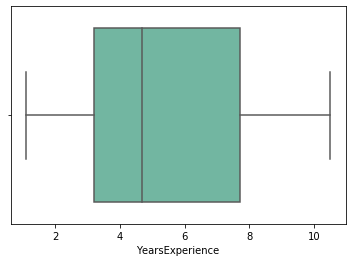

In [44]:
sns.boxplot(df['YearsExperience'],data=df,palette='Set2')

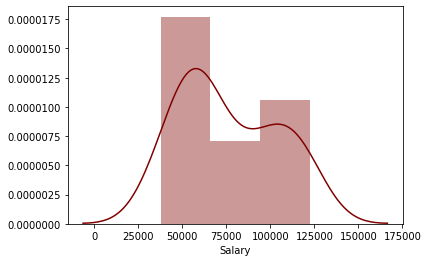

In [45]:
sns.distplot(df['Salary'],bins=3,color ='maroon')

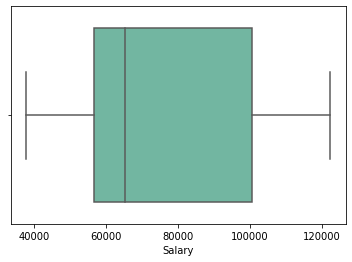

In [46]:
sns.boxplot(df['Salary'],data=df,palette='Set2')

Text(0, 0.5, 'Salary (INR)')

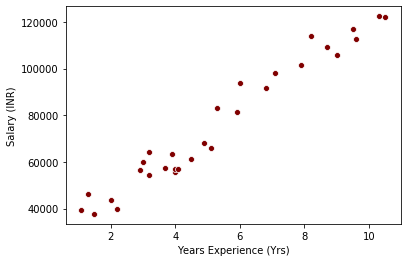

In [64]:
sns.scatterplot(df['YearsExperience'],df['Salary'],color='maroon')
plt.xlabel('Years Experience (Yrs)')
plt.ylabel('Salary (INR)')

In [65]:
# Correlation Value between X and Y

In [66]:
df['YearsExperience'].corr(df['Salary'])

0.9782416184887599

In [67]:
np.corrcoef(df['YearsExperience'],df['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [68]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


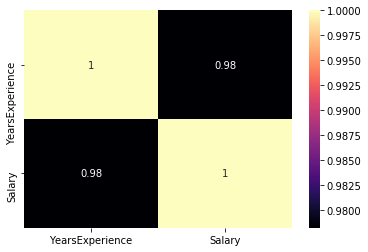

In [95]:
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [71]:
# Preparing Linear Regression model hence importing Statsmodels.formula.api

In [72]:
import statsmodels.formula.api as smf

In [82]:
model = smf.ols('Salary~YearsExperience',data=df).fit()

In [83]:
model.params  

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.14e-20
Time:                        14:09:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
model.conf_int(0.05)  # 95% Confidence interval 

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [135]:
prediction = model.predict(df)
prediction

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0, 0.5, 'Salary')

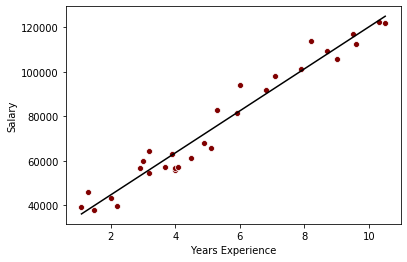

In [117]:
sns.scatterplot(df['YearsExperience'],df['Salary'],color='maroon')
plt.plot(df['YearsExperience'],prediction,color='black')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [119]:
prediction.corr(df['Salary'])

0.9782416184887601

In [121]:
# Transforming variables for accuracy

In [124]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit()

In [125]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [126]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           3.25e-13
Time:                        17:53:20   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
print(model2.conf_int(0.01)) # 99% Confidence interval

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [133]:
prediction2 = model2.predict(df['YearsExperience'])

In [131]:
prediction2.corr(df['Salary'])

0.9240610817882637

In [134]:
prediction2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'Salary')

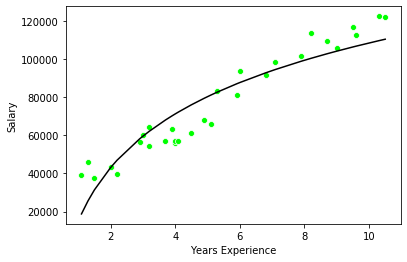

In [142]:
sns.scatterplot(df['YearsExperience'],df['Salary'],color='lime')
plt.plot(df['YearsExperience'],prediction2,color='black')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [143]:
# Exponential transformation

In [158]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=df).fit()

In [159]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [160]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           7.03e-18
Time:                        18:15:06   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model3.conf_int(0.01)

,0,1
Intercept,10.401175,10.613629
YearsExperience,0.107752,0.143153


In [162]:
pred_log = model3.predict(df['YearsExperience'])

In [163]:
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [164]:
prediction3 = np.exp(pred_log)

In [165]:
prediction3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [166]:
prediction3.corr(df['Salary'])

0.9660469705377085

Text(0, 0.5, 'Salary')

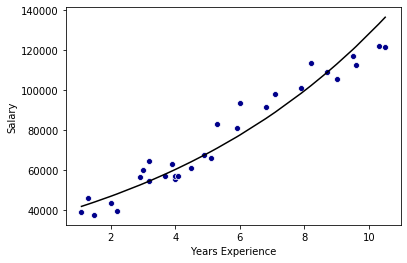

In [170]:
sns.scatterplot(df['YearsExperience'],df['Salary'],color='darkblue')
plt.plot(df['YearsExperience'],prediction3,color='black')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [171]:
resid_3 = prediction3 - df['Salary']

In [172]:
resid_3

0      2655.957468
1     -3138.933206
2      6429.289228
3      3494.029189
4      8322.688474
5     -4002.857528
6     -6846.324614
7       213.014935
8     -9786.985065
9      1007.330788
10    -3543.017097
11     4634.338456
12     3471.338456
13     4110.204604
14     3229.199291
15     -286.753851
16     3341.128712
17   -11955.315365
18    -4669.369220
19   -16278.164960
20    -5877.295792
21    -9119.274607
22    -2736.190409
23   -11465.889488
24     -459.459242
25     7568.933364
26     3506.819601
27     9361.743836
28    10803.621344
29    14706.829694
dtype: float64

In [182]:
data_resid = model3.resid_pearson  # getting residuals of the entire data set

Text(0, 0.5, 'Standardized Residual')

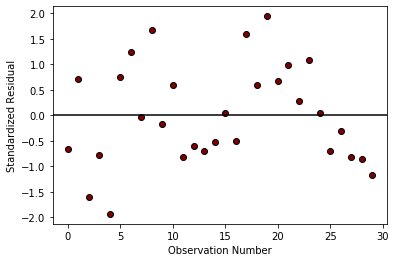

In [195]:
plt.plot(data_resid,'o',color='maroon',markeredgecolor='black')
plt.axhline(color='black')
plt.xlabel('Observation Number')
plt.ylabel('Standardized Residual')

Text(0, 0.5, 'Actual Values')

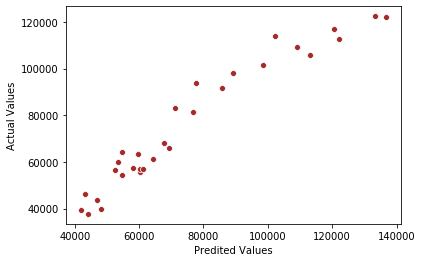

In [205]:
sns.scatterplot(x=prediction3,y=df['Salary'],color='brown')
plt.xlabel('Predited Values')
plt.ylabel('Actual Values')

In [206]:
from sklearn import metrics

In [219]:
print('MAE :', metrics.mean_absolute_error(df['Salary'],prediction))
print('MSE :', metrics.mean_squared_error(df['Salary'],prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(df['Salary'],prediction)))

MAE : 4644.20128944354
MSE : 31270951.72228097
RMSE : 5592.043608760662
